In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
r = readers.CollectionReader('../src/adv_sign_only/agents/')

100%|██████████| 320/320 [00:38<00:00,  8.37it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [4]:
games= ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
        "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2",
        "InvertedDoublePendulum-v2"]
code_level_opts = {
      'kl_penalty_direction': ['new_to_old'],
      "clip_eps": [0.2],
      "kl_penalty_coeff": [0.0],
      "sign_advantages": [False, True],
      "norm_rewards": ["returns", "none"],
}

NUM_BINS = 20

In [5]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

In [6]:
def filter_df(df, **kwargs):
    for k,v in kwargs.items():
        df = df[df[k] == v]
    return df

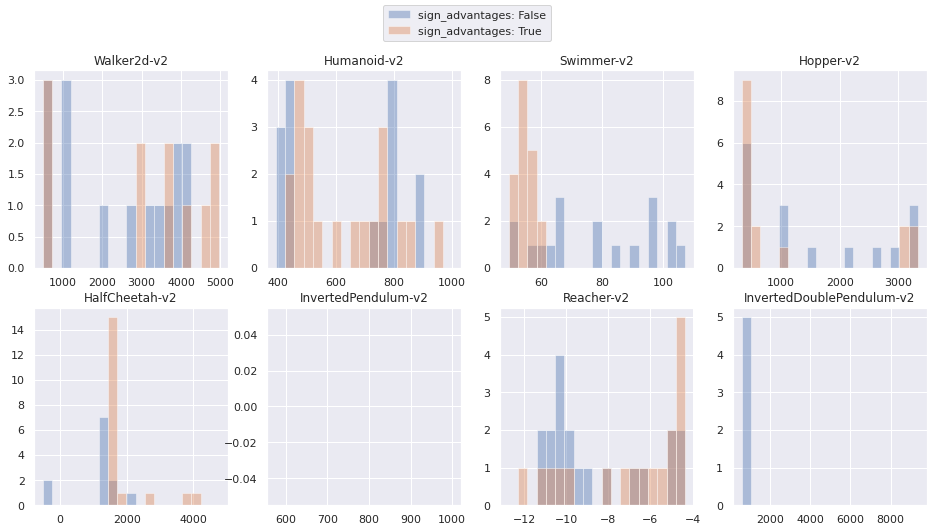

In [8]:
max_rewards = opt.groupby(['exp_id', 'game'] + list(code_level_opts.keys())).max()
max_rewards = max_rewards.reset_index()

# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    # Histogram setup
    _, bin_edges = np.histogram(max_rewards[max_rewards.game == g][
        'mean_reward'].tolist(), NUM_BINS)
    bin_locs = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_ws = (bin_edges[1] - bin_edges[0])
    kwargs = {'width': bin_ws, 'alpha': 0.65}
    
    for i, cl_opt in enumerate(['sign_advantages']):
        for ib, b in enumerate(code_level_opts[cl_opt]):
            filt = max_rewards[(max_rewards[cl_opt] == b) & (max_rewards.game == g)]
            #hist, _ = np.histogram(filt['mean_reward'].tolist(), bin_edges)
            #hist = np.flip(np.cumsum(np.flip(hist))) / np.sum(hist)
            sns.distplot(filt['mean_reward'].tolist(),
                         bins=bin_locs, label=f"{cl_opt}: {b}", ax=ax.flatten()[j], kde=False)
        ax.flatten()[j].set_title(g)
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.show()

In [10]:
max_rewards.groupby(['game', 'sign_advantages', 'clip_eps']).mean()

kl_penalty_coeff  \
game                      sign_advantages clip_eps                     
HalfCheetah-v2            False           0.2                    0.0   
                          True            0.2                    0.0   
Hopper-v2                 False           0.2                    0.0   
                          True            0.2                    0.0   
Humanoid-v2               False           0.2                    0.0   
                          True            0.2                    0.0   
InvertedDoublePendulum-v2 False           0.2                    0.0   
                          True            0.2                    0.0   
InvertedPendulum-v2       False           0.2                    0.0   
                          True            0.2                    0.0   
Reacher-v2                False           0.2                    0.0   
                          True            0.2                    0.0   
Swimmer-v2                False           0.2                    0.0   
                          True            0.2                    0.0   
Walker2d-v2               False           0.2                    0.0   
                          True            0.2                    0.0   

                                                    mean_reward  \
game                      sign_advantages clip_eps                
HalfCheetah-v2            False           0.2        455.938332   
                          True            0.2       2031.739993   
Hopper-v2                 False           0.2       1282.773578   
                          True            0.2       1606.095857   
Humanoid-v2               False           0.2        630.778299   
                          True            0.2        620.975789   
InvertedDoublePendulum-v2 False           0.2       4950.811802   
                          True            0.2       9356.070135   
InvertedPendulum-v2       False           0.2        978.283333   
                          True            0.2       1000.000000   
Reacher-v2                False           0.2         -8.822553   
                          True            0.2         -6.770324   
Swimmer-v2                False           0.2         78.308418   
                          True            0.2         54.734326   
Walker2d-v2               False           0.2       1910.058172   
                          True            0.2       2340.235786   

                                                    final_value_loss  \
game                      sign_advantages clip_eps                     
HalfCheetah-v2            False           0.2           4.251537e+06   
                          True            0.2           3.168762e+02   
Hopper-v2                 False           0.2           3.106769e+03   
                          True            0.2           1.081520e+03   
Humanoid-v2               False           0.2           1.557879e+03   
                          True            0.2           2.149120e+03   
InvertedDoublePendulum-v2 False           0.2           7.218419e+03   
                          True            0.2           1.097059e+04   
InvertedPendulum-v2       False           0.2           2.947159e+03   
                          True            0.2           6.704894e+02   
Reacher-v2                False           0.2           4.147797e+02   
                          True            0.2           3.780302e+02   
Swimmer-v2                False           0.2           7.790682e+00   
                          True            0.2           6.878514e+00   
Walker2d-v2               False           0.2           2.328878e+03   
                          True            0.2           3.862465e+02   

                                                    mean_std  opt_step  
game                      sign_advantages clip_eps                      
HalfCheetah-v2            False           0.2       8.602944       499  
                          True  

In [11]:
max_rewards.groupby(['game', 'sign_advantages', 'clip_eps']).std()

kl_penalty_coeff  \
game                      sign_advantages clip_eps                     
HalfCheetah-v2            False           0.2                    0.0   
                          True            0.2                    0.0   
Hopper-v2                 False           0.2                    0.0   
                          True            0.2                    0.0   
Humanoid-v2               False           0.2                    0.0   
                          True            0.2                    0.0   
InvertedDoublePendulum-v2 False           0.2                    0.0   
                          True            0.2                    0.0   
InvertedPendulum-v2       False           0.2                    0.0   
                          True            0.2                    0.0   
Reacher-v2                False           0.2                    0.0   
                          True            0.2                    0.0   
Swimmer-v2                False           0.2                    0.0   
                          True            0.2                    0.0   
Walker2d-v2               False           0.2                    0.0   
                          True            0.2                    0.0   

                                                    mean_reward  \
game                      sign_advantages clip_eps                
HalfCheetah-v2            False           0.2       1054.617228   
                          True            0.2       1001.257948   
Hopper-v2                 False           0.2       1181.973161   
                          True            0.2       1412.307206   
Humanoid-v2               False           0.2        233.317500   
                          True            0.2        156.375592   
InvertedDoublePendulum-v2 False           0.2       4492.614472   
                          True            0.2         10.054489   
InvertedPendulum-v2       False           0.2         97.119886   
                          True            0.2          0.000000   
Reacher-v2                False           0.2          2.569160   
                          True            0.2          2.705508   
Swimmer-v2                False           0.2         20.561540   
                          True            0.2          2.898220   
Walker2d-v2               False           0.2       1529.360396   
                          True            0.2       1993.008604   

                                                    final_value_loss  \
game                      sign_advantages clip_eps                     
HalfCheetah-v2            False           0.2           4.401475e+06   
                          True            0.2           3.316234e+02   
Hopper-v2                 False           0.2           4.372288e+03   
                          True            0.2           1.585555e+03   
Humanoid-v2               False           0.2           1.613508e+03   
                          True            0.2           2.207385e+03   
InvertedDoublePendulum-v2 False           0.2           6.005886e+03   
                          True            0.2           1.018597e+04   
InvertedPendulum-v2       False           0.2           3.319477e+03   
                          True            0.2           2.899093e+02   
Reacher-v2                False           0.2           4.253884e+02   
                          True            0.2           3.890431e+02   
Swimmer-v2                False           0.2           8.136435e+00   
                          True            0.2           6.473648e+00   
Walker2d-v2               False           0.2           2.967001e+03   
                          True            0.2           5.225227e+02   

                                                    mean_std  opt_step  
game                      sign_advantages clip_eps                      
HalfCheetah-v2            False           0.2       7.682299       0.0  
                          True  

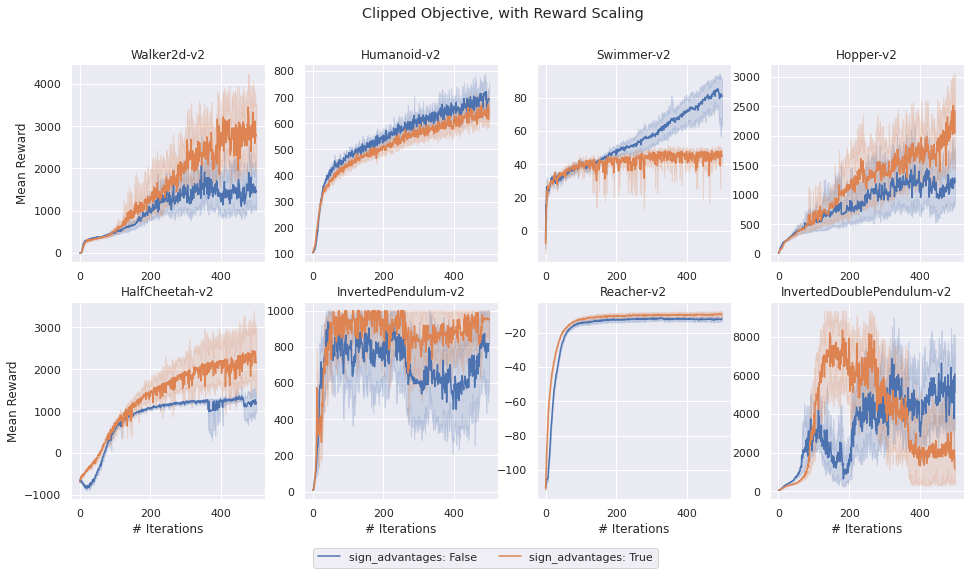

In [31]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt_1 = 'sign_advantages'
    for b in code_level_opts[cl_opt_1]:
        filt = filter_df(opt, sign_advantages=b, norm_rewards='returns', game=g)
        #filt = opt[(opt[cl_opt_1] == b) & (opt[cl_opt_2] == c) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"{cl_opt_1}: {b}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Clipped Objective, with Reward Scaling')
    

handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)    
    
plt.show()

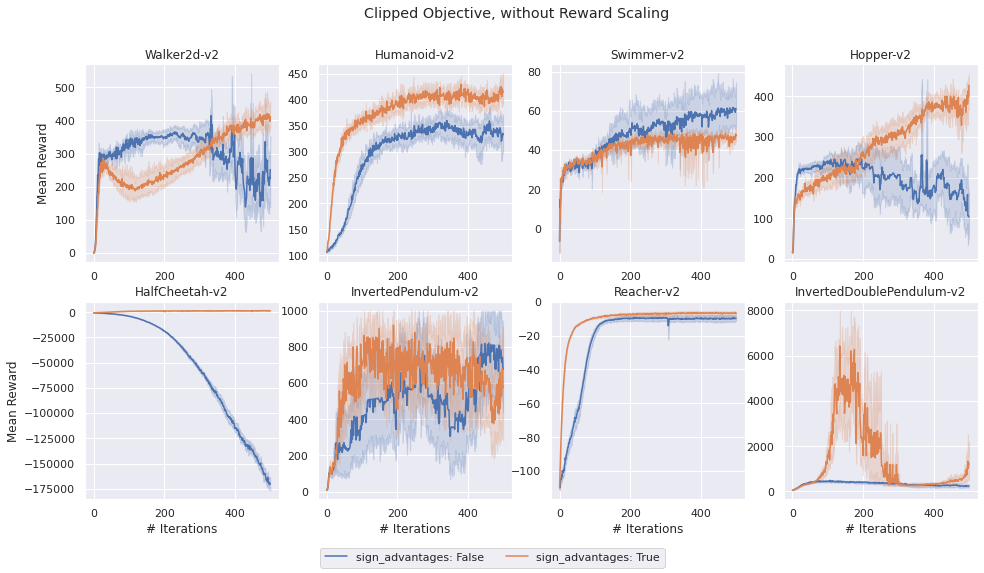

In [32]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt_1 = 'sign_advantages'
    for b in code_level_opts[cl_opt_1]:
        filt = filter_df(opt, sign_advantages=b, norm_rewards='none', game=g)
        #filt = opt[(opt[cl_opt_1] == b) & (opt[cl_opt_2] == c) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"{cl_opt_1}: {b}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Clipped Objective, without Reward Scaling')
    

handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)    
    
plt.show()

In [4]:
r = readers.CollectionReader('../src/adv_sign_only_initial/agents/')

100%|██████████| 32/32 [00:05<00:00,  6.24it/s]


In [5]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [6]:
games = ["HalfCheetah-v2", "Walker2d-v2", "Humanoid-v2", "Hopper-v2"]
code_level_opts = {
      'kl_closed_form': [False],
      'kl_penalty_direction': ['new_to_old'],
      "clip_eps": [0.2, 1e8],
      "kl_penalty_coeff": [0.0, 3.0],
}

NUM_BINS = 20

In [7]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

# Plot mean rewards

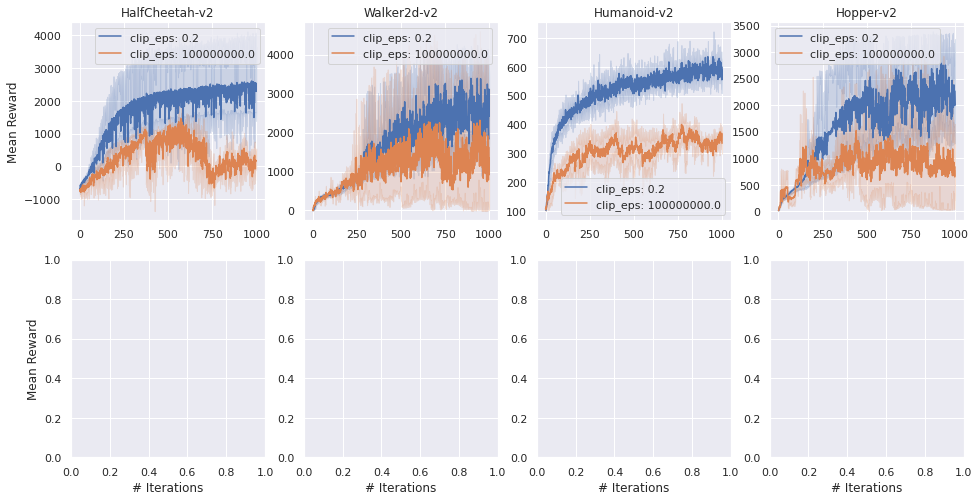

In [8]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'clip_eps'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

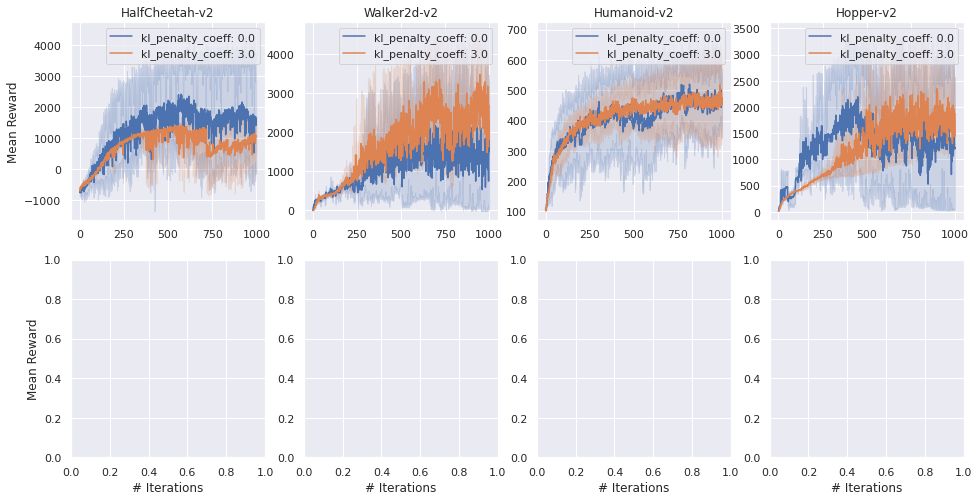

In [9]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_coeff'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

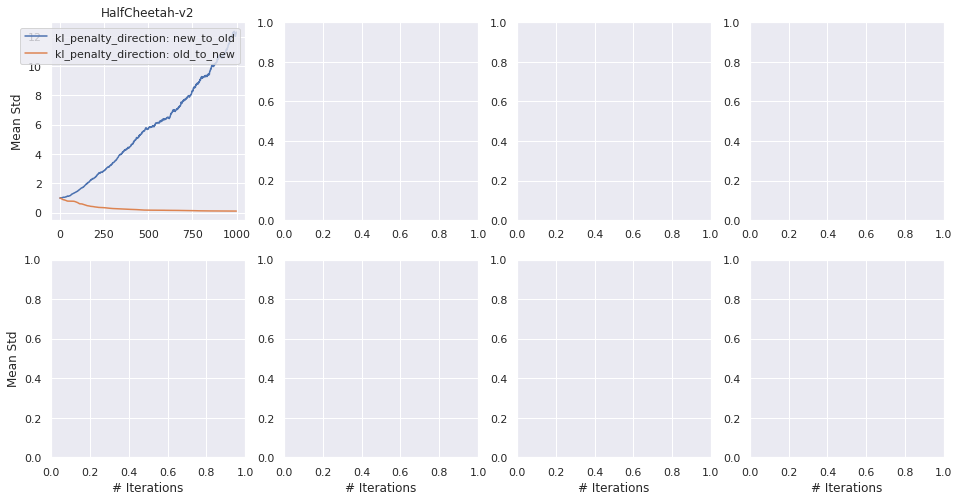

In [29]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_std, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Std')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

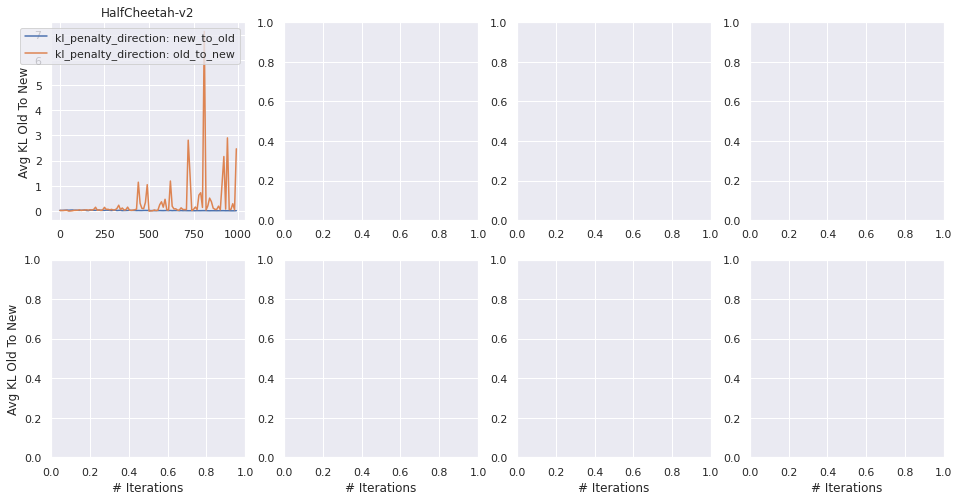

In [27]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = constraints_heldout[(constraints_heldout[cl_opt] == b) & (constraints_heldout.game == g)]
        sns.lineplot(filt.opt_step, filt.avg_kl_old_to_new, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Avg KL Old To New')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

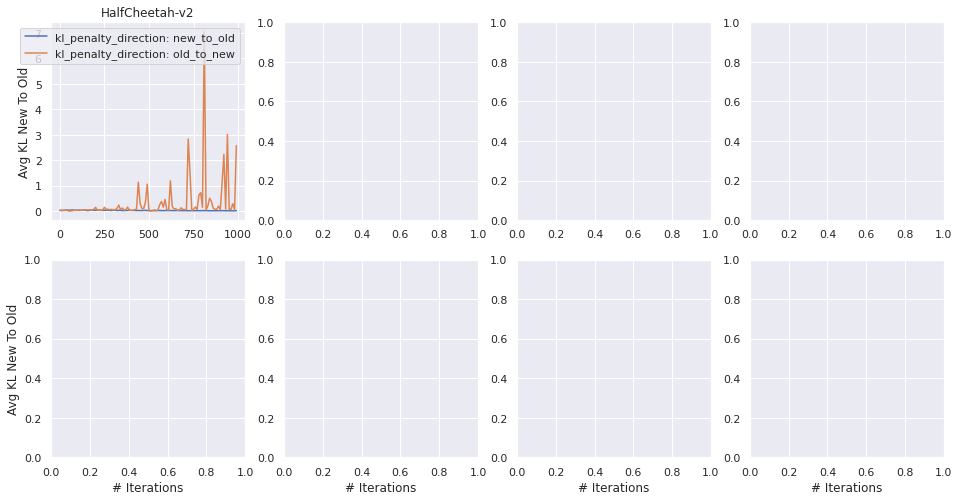

In [28]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = constraints_heldout[(constraints_heldout[cl_opt] == b) & (constraints_heldout.game == g)]
        sns.lineplot(filt.opt_step, filt.avg_kl_new_to_old, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Avg KL New To Old')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()